In [1]:
!del /Q utils\__pycache__

In [2]:
import pandas as pd
from utils.datasets import GhlKasperskyDataset
from utils.custom_plots import plot_stacked

In [3]:
from adtk.metrics import f1_score, precision, recall
from adtk.visualization import plot

## Prepare dataset

In [4]:
ds = GhlKasperskyDataset()

ds.shake_not_stir()

## Detectors

### ThresholdAD

In [5]:
from adtk.detector import ThresholdAD

ThresholdAD compares each time series value with given thresholds. Thresholds are user-given and the detector is not fit.

### QuantileAD

In [6]:
from adtk.detector import QuantileAD

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

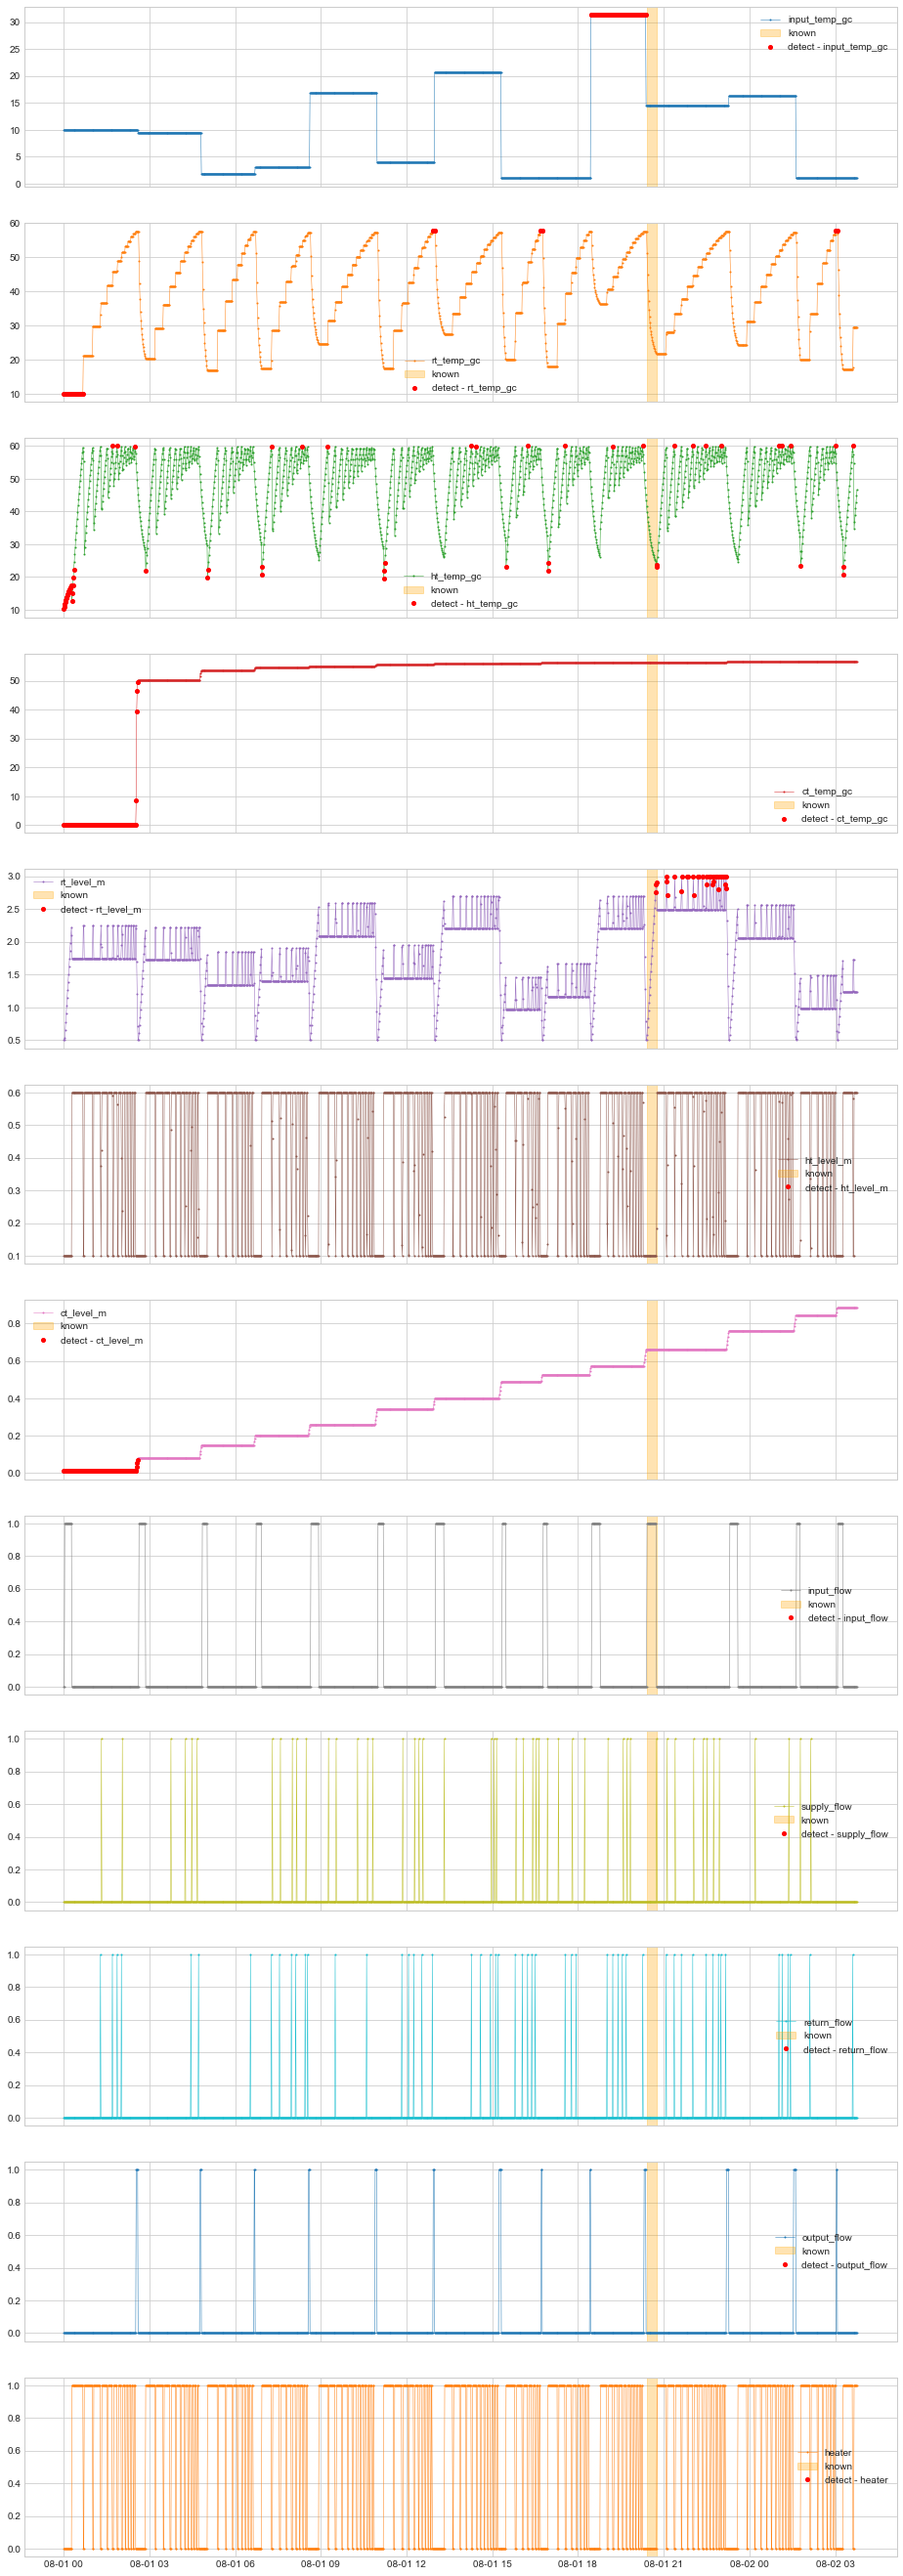

In [7]:
quantile_ad = QuantileAD(low=0.01, high=0.99)

train = ds.train_generator()
data, anomalies, info = next(train)
quantile_ad.fit(data)

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
detect = quantile_ad.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

In [8]:
detect_ = detect.sum(axis=1)
print(precision(anomalies, detect_), recall(anomalies, detect_), f1_score(anomalies, detect_))

0.005633802816901409 0.1 0.010666666666666666


A lot of false positive, because some values in usual limits all time. Especially poor for actuators.

### InterQuartileRangeAD

In [9]:
from adtk.detector import InterQuartileRangeAD

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

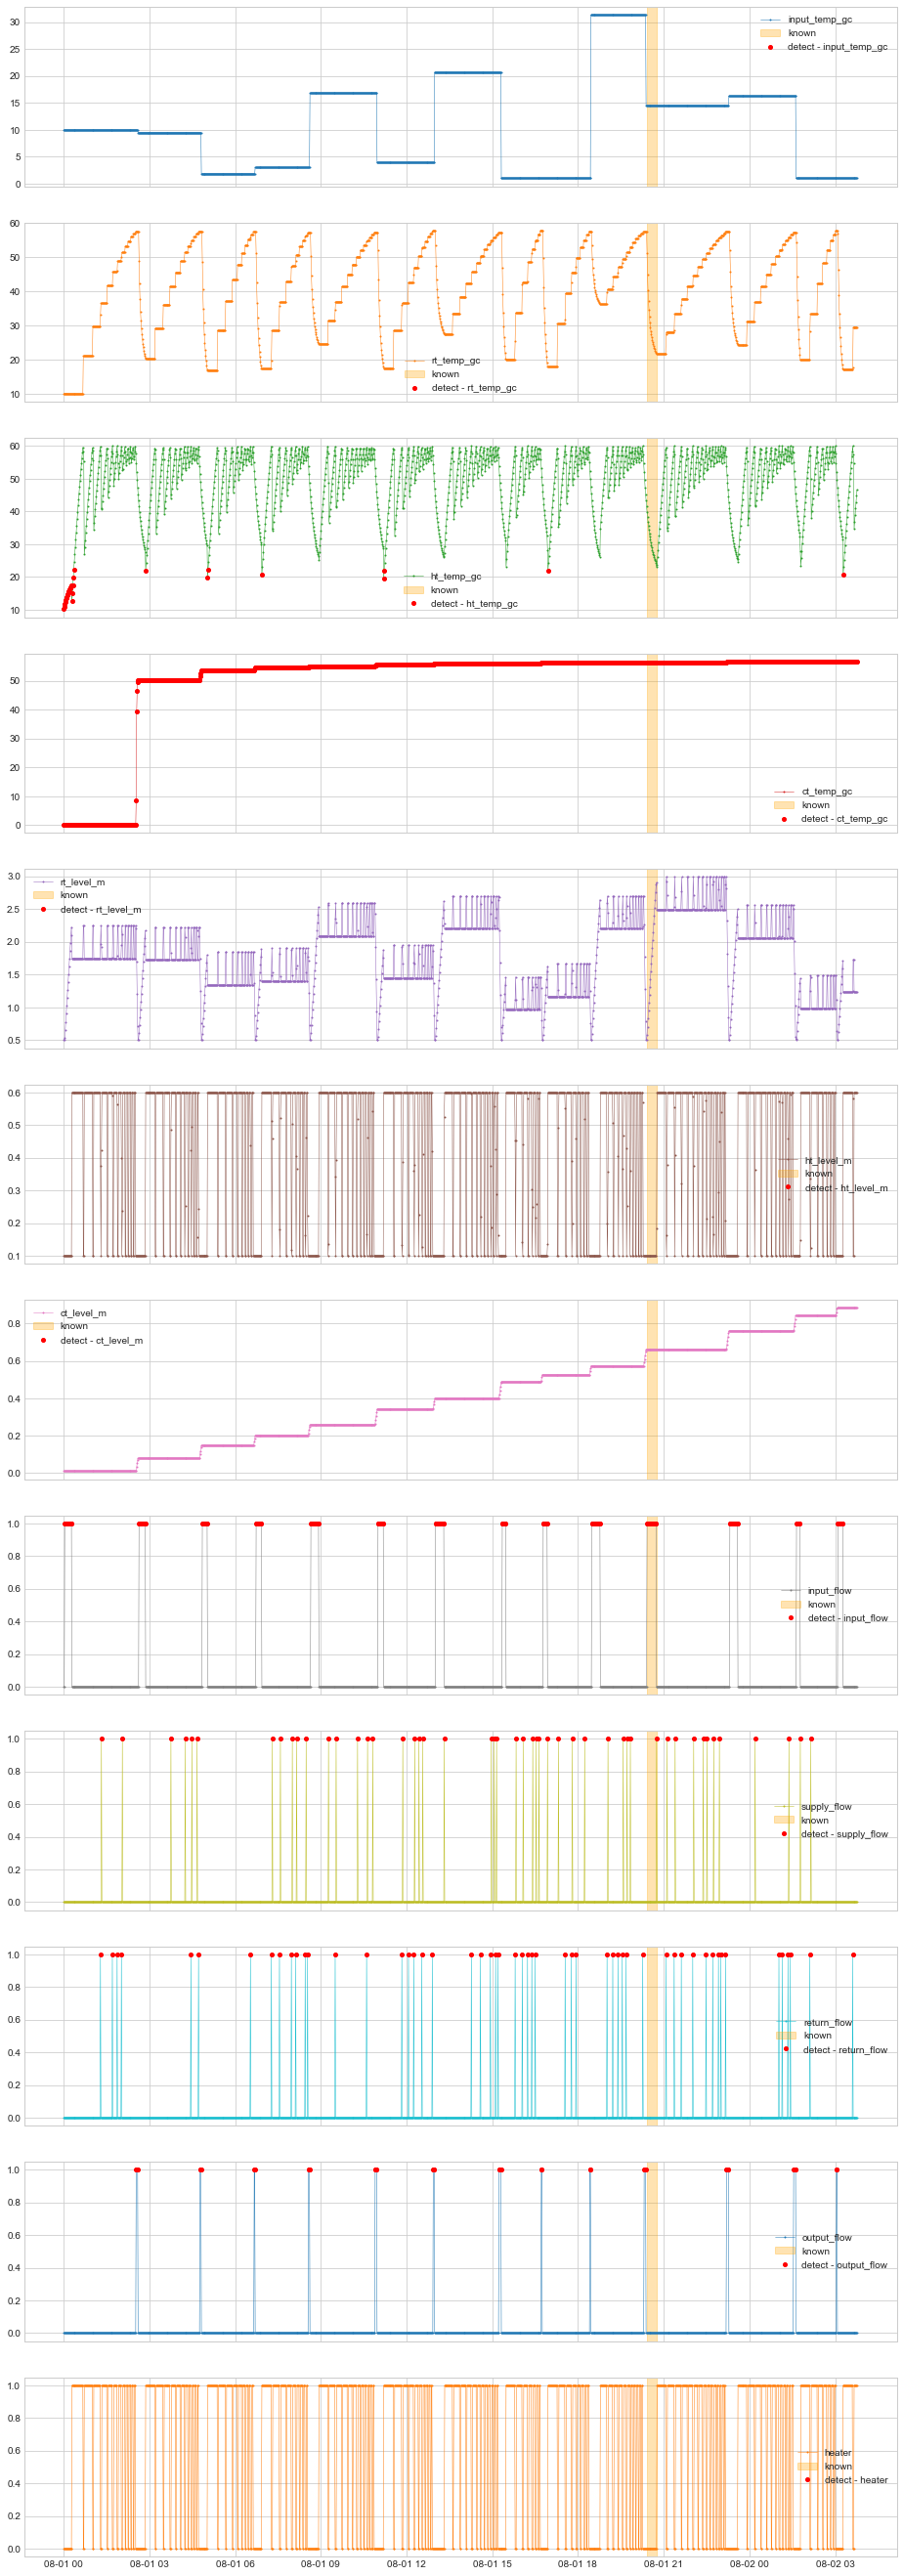

In [10]:
iqr_ad = InterQuartileRangeAD(c=1.5)

train = ds.train_generator()
data, anomalies, info = next(train)
iqr_ad.fit(data)

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
detect = iqr_ad.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

In [11]:
detect_ = detect.sum(axis=1)
print(precision(anomalies, detect_), recall(anomalies, detect_), f1_score(anomalies, detect_))

0.01199760047990402 1.0 0.023710729104919975


A lot of false positive, because some values in usual limits all time. Especially poor for actuators.

### GeneralizedESDTestAD

In [12]:
from adtk.detector import GeneralizedESDTestAD

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

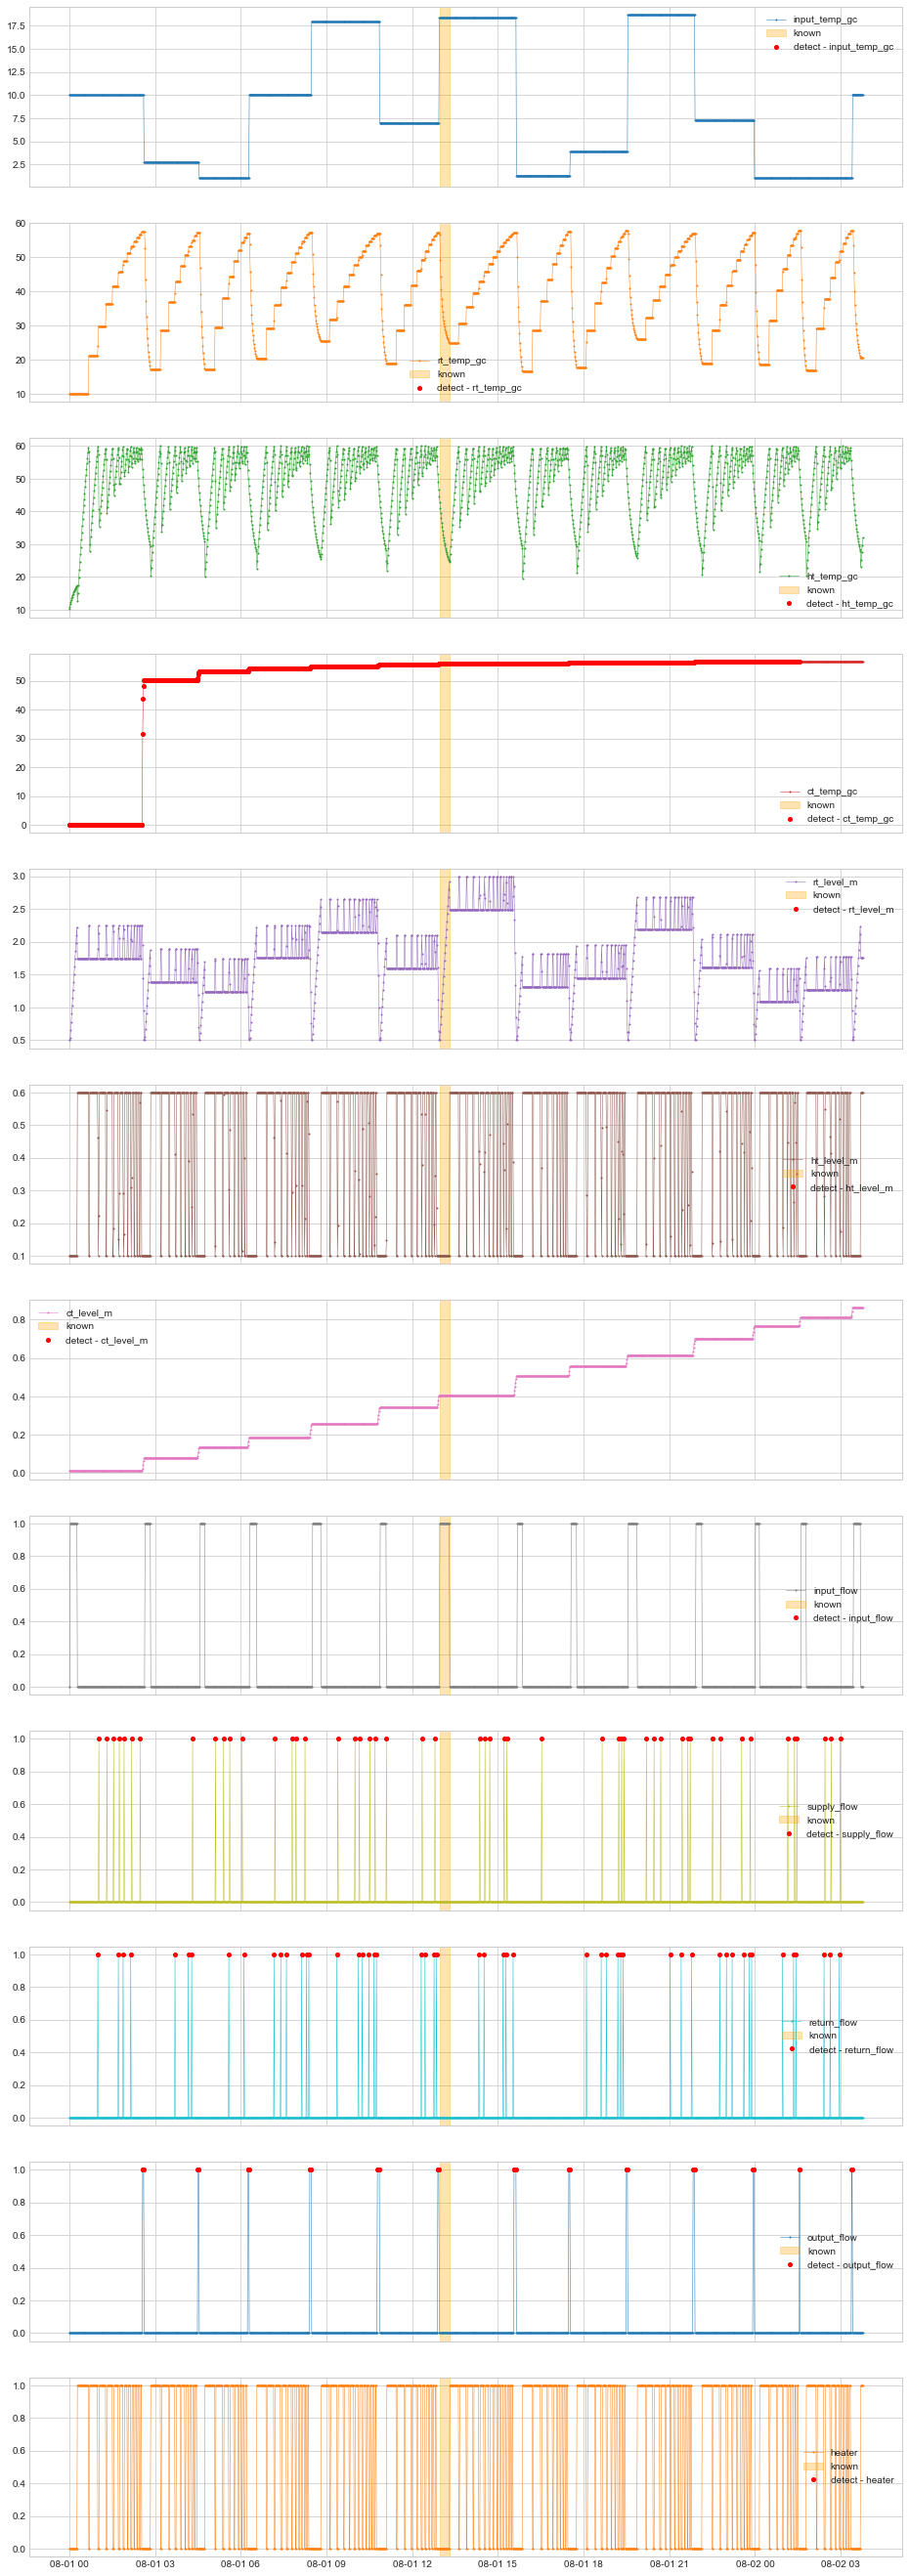

In [13]:
esd_ad = GeneralizedESDTestAD(alpha=0.05)

train = ds.train_generator()
data, anomalies, info = next(train)
esd_ad.fit(data)

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
detect = esd_ad.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

Does not fit on data at all.

### PersistAD

In [14]:
from adtk.detector import PersistAD

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

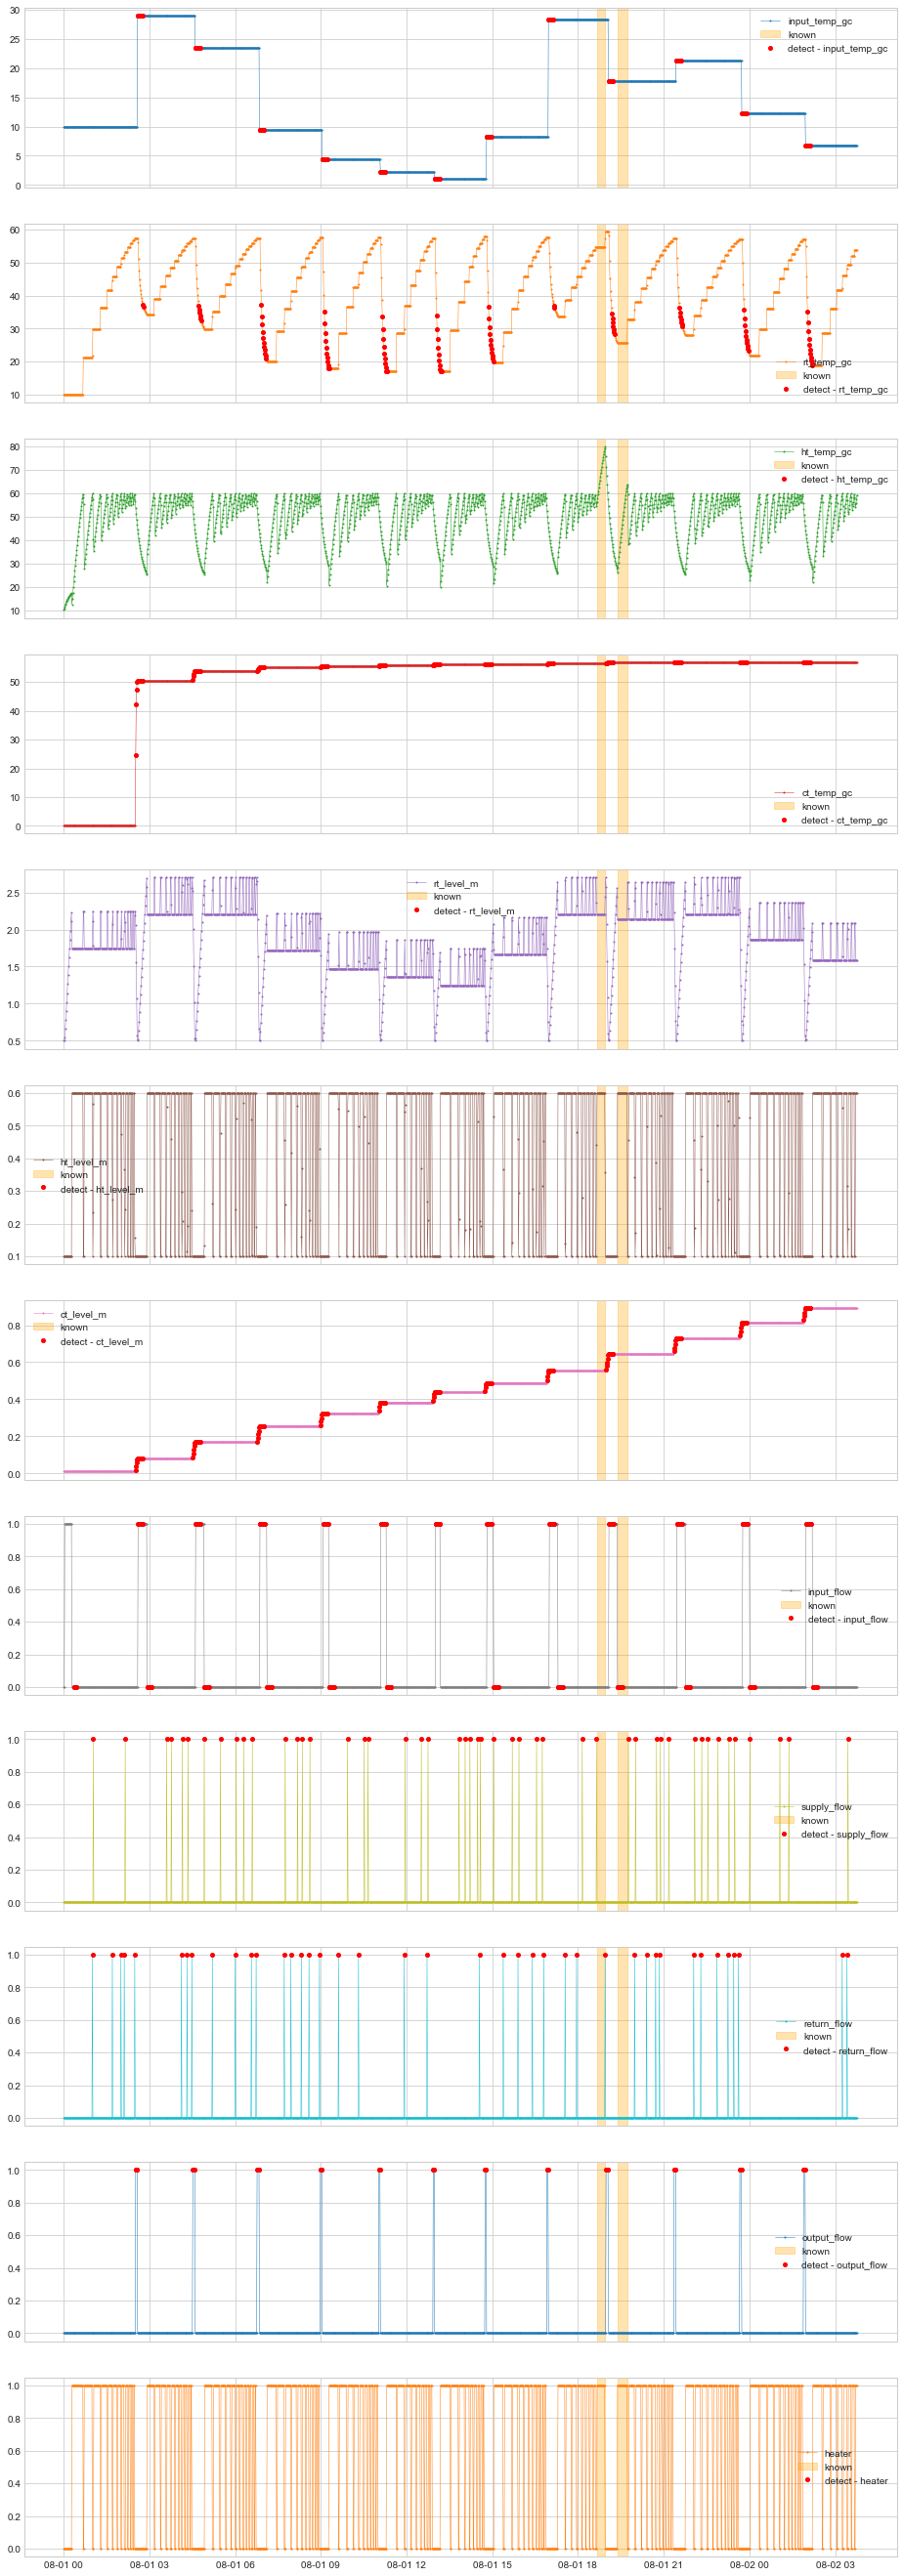

In [15]:
persist_ad = PersistAD(window=21, c=3.0, side='both')

# train = ds.train_generator()
# data, anomalies, info = next(train)

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
persist_ad.fit(data)
detect = persist_ad.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

Very bad.

### LevelShiftAD

In [16]:
from adtk.detector import LevelShiftAD

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

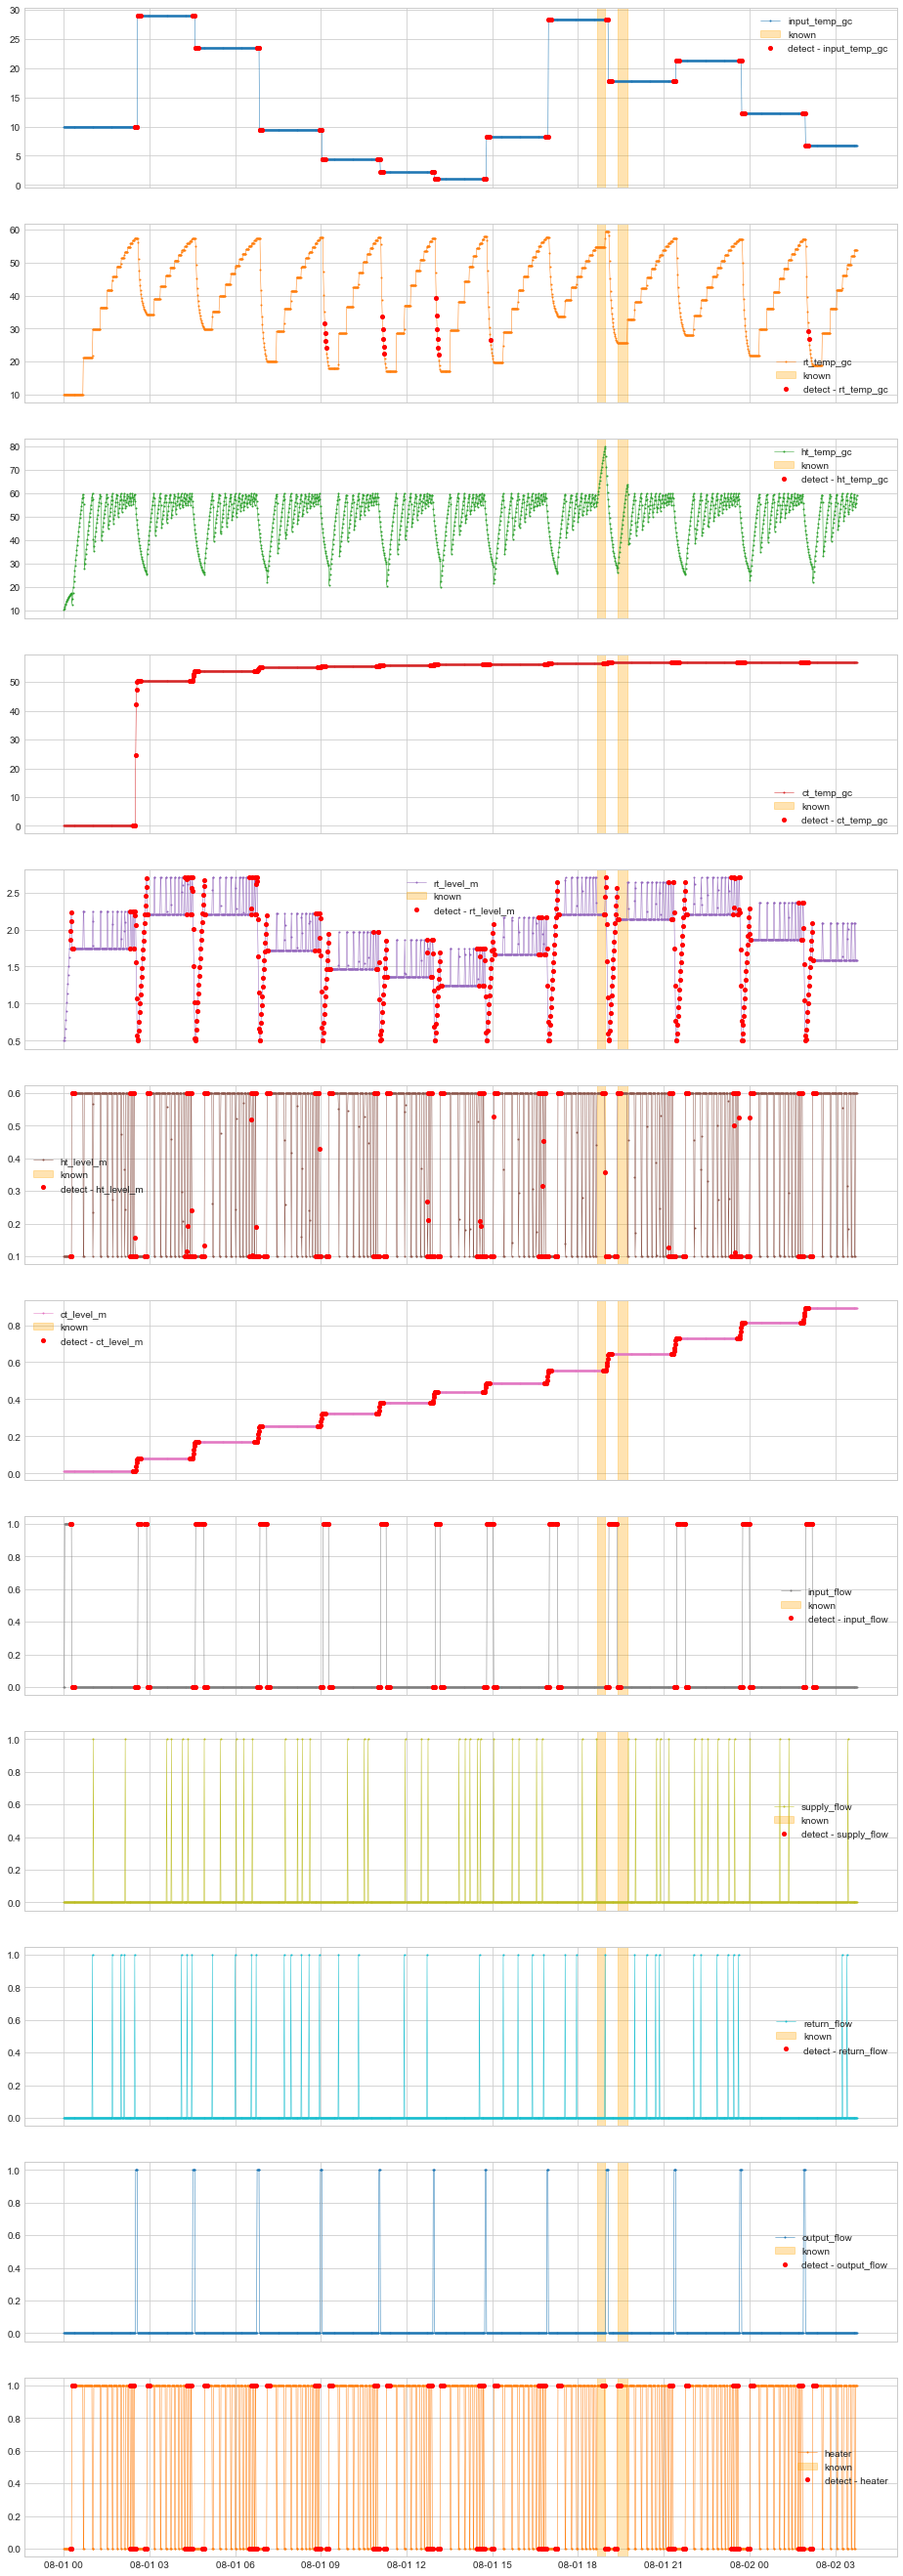

In [17]:
level_shift_ad = LevelShiftAD(c=6.0, side='both', window=13)

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
level_shift_ad.fit(data)
detect = level_shift_ad.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

Very bad.

### VolatilityShiftAD

In [18]:
from adtk.detector import VolatilityShiftAD

C:\Users\Stepan\anaconda3\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

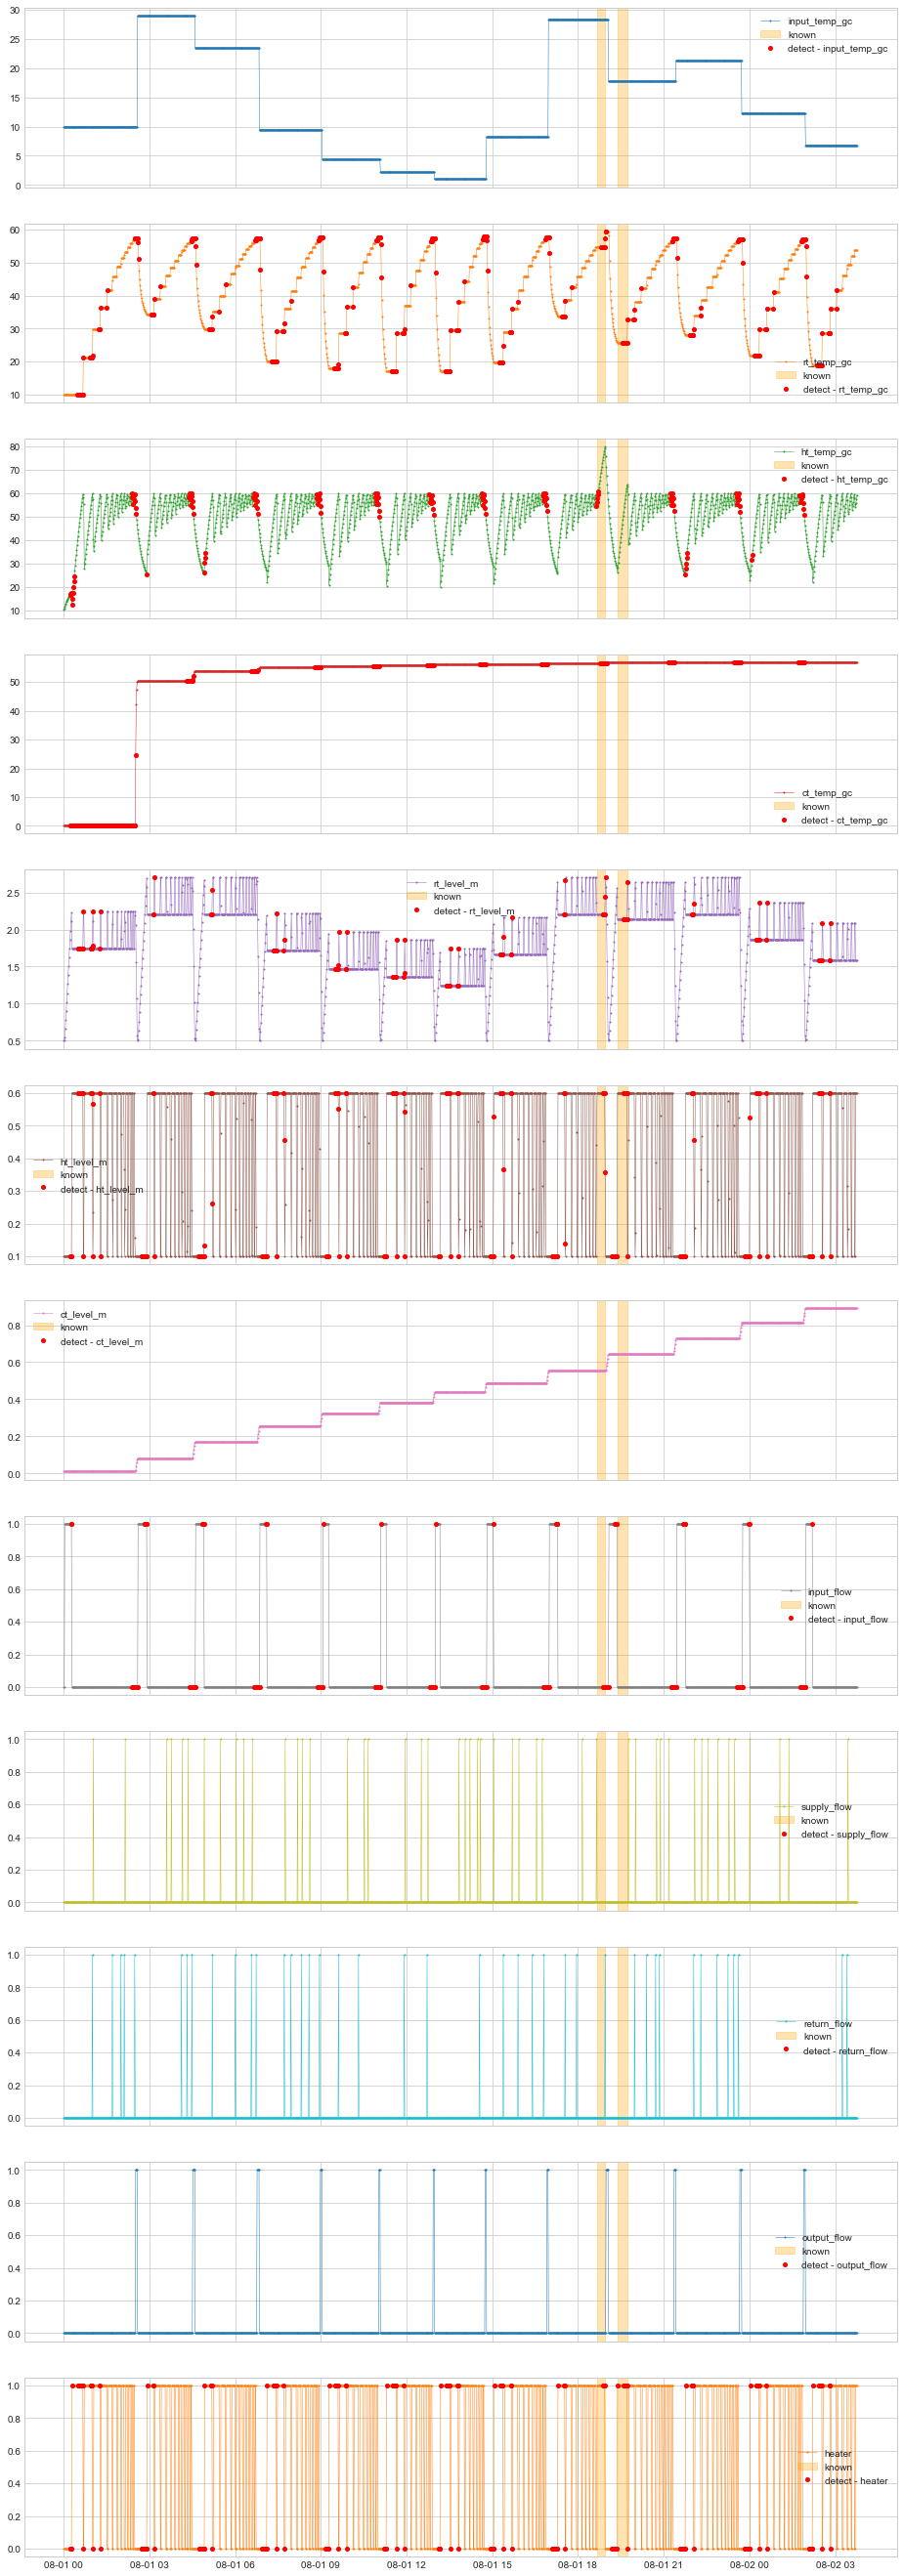

In [19]:
volatility_shift_ad  = VolatilityShiftAD(c=6.0, side='both', window=13)

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
volatility_shift_ad.fit(data)
detect = volatility_shift_ad.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

### SeasonalAD

In [24]:
from adtk.detector import SeasonalAD

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

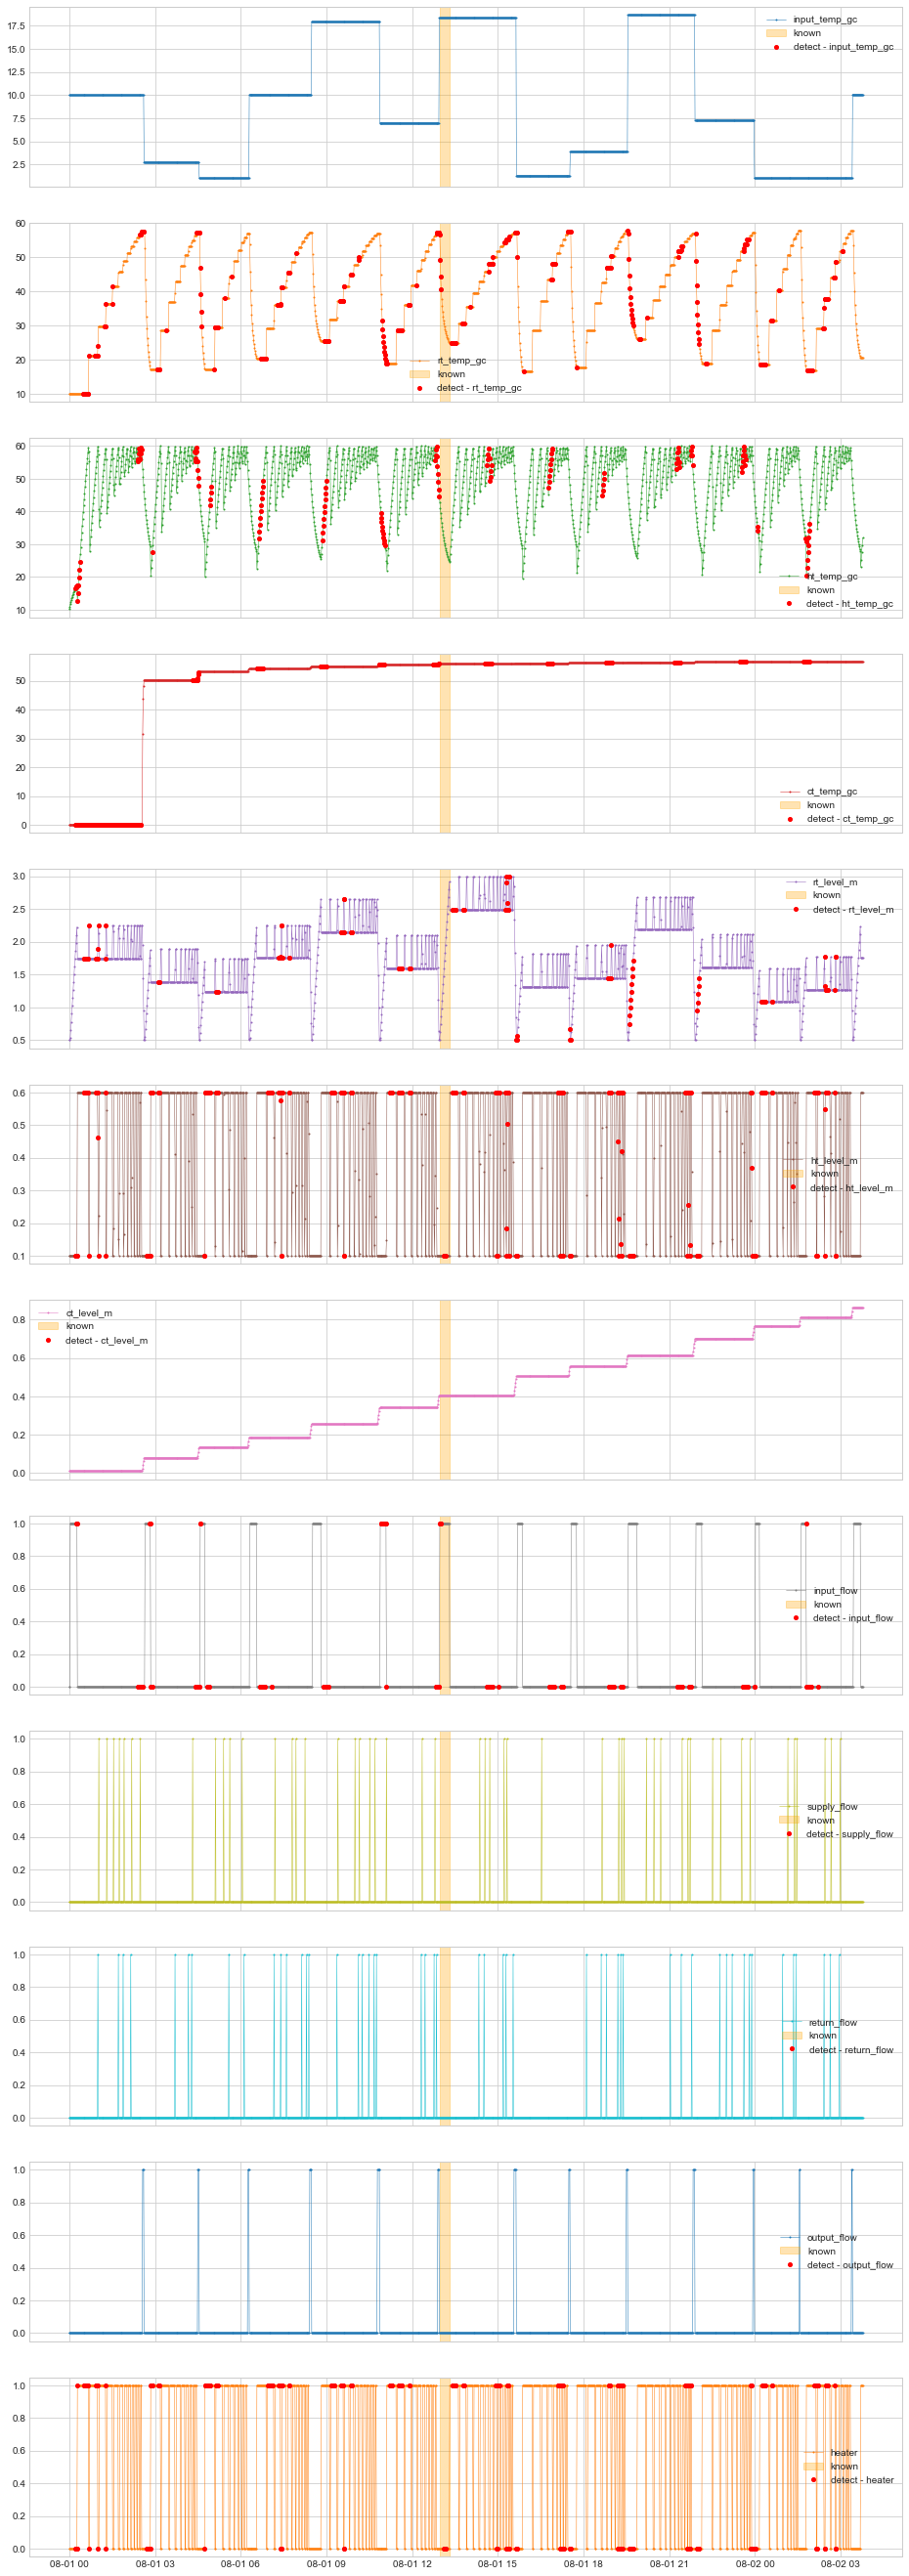

In [25]:
seasonal_ad  = SeasonalAD(c=3.0, side='both')

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
# seasonal_ad.fit(data)
# detect = seasonal_ad.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

### AutoregressionAD

In [26]:
from adtk.detector import AutoregressionAD

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

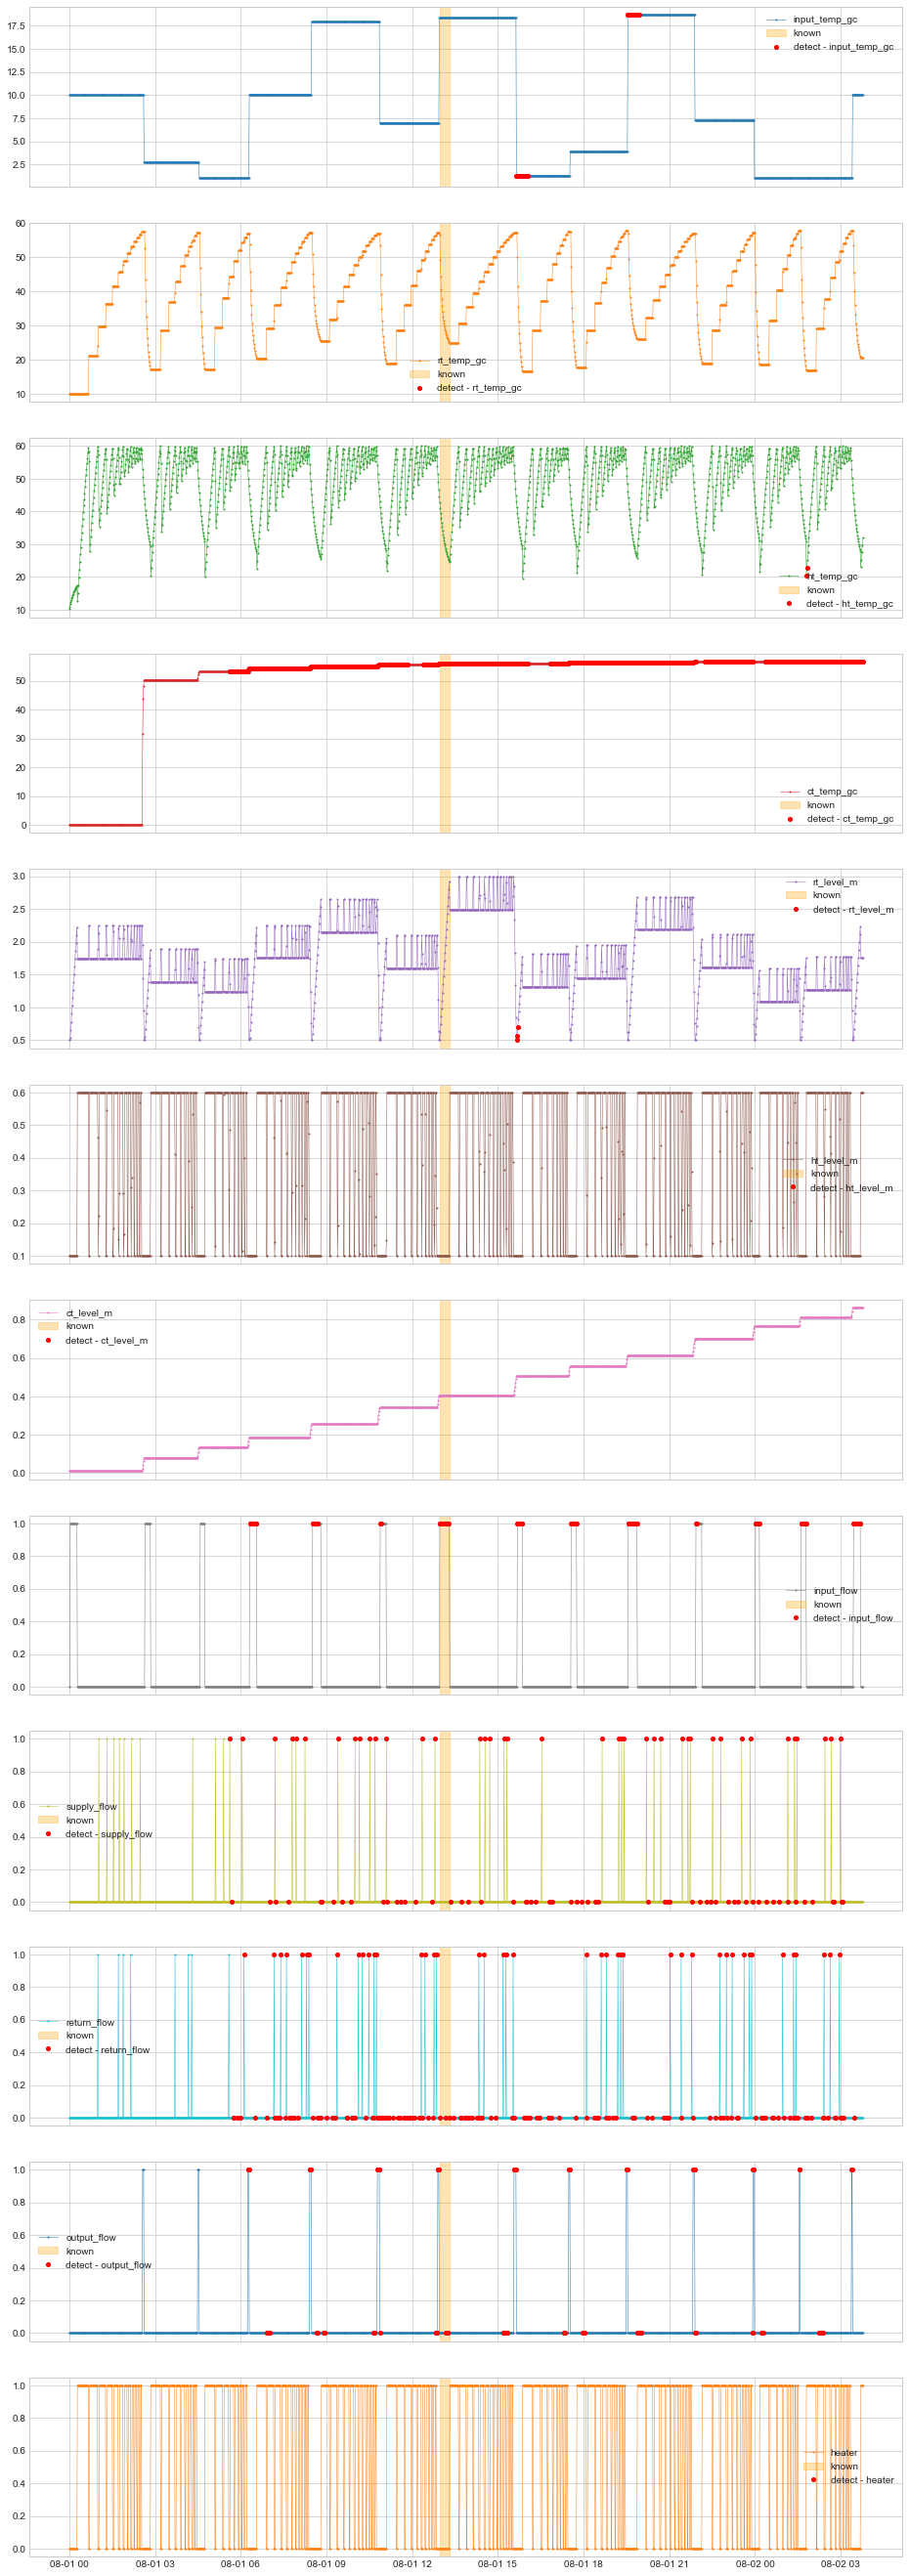

In [27]:
autoregression_ad = AutoregressionAD(n_steps=7*2, step_size=24, c=3.0)

train = ds.train_generator()
data, anomalies, info = next(train)
autoregression_ad.fit(data)

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
detect = autoregression_ad.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

### MinClusterDetector

In [28]:
from adtk.detector import MinClusterDetector
from sklearn.cluster import KMeans

In [29]:
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=3))

train = ds.train_generator()
data, anomalies, info = next(train)
min_cluster_detector.fit(data)

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
detect = min_cluster_detector.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

AttributeError: 'NoneType' object has no attribute 'split'

Good idea, but doen't work example.

### OutlierDetector

In [ ]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))

train = ds.train_generator()
data, anomalies, info = next(train)
outlier_detector.fit(data)

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
detect = outlier_detector.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

### RegressionAD

In [30]:
from adtk.detector import RegressionAD
from sklearn.linear_model import LinearRegression

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

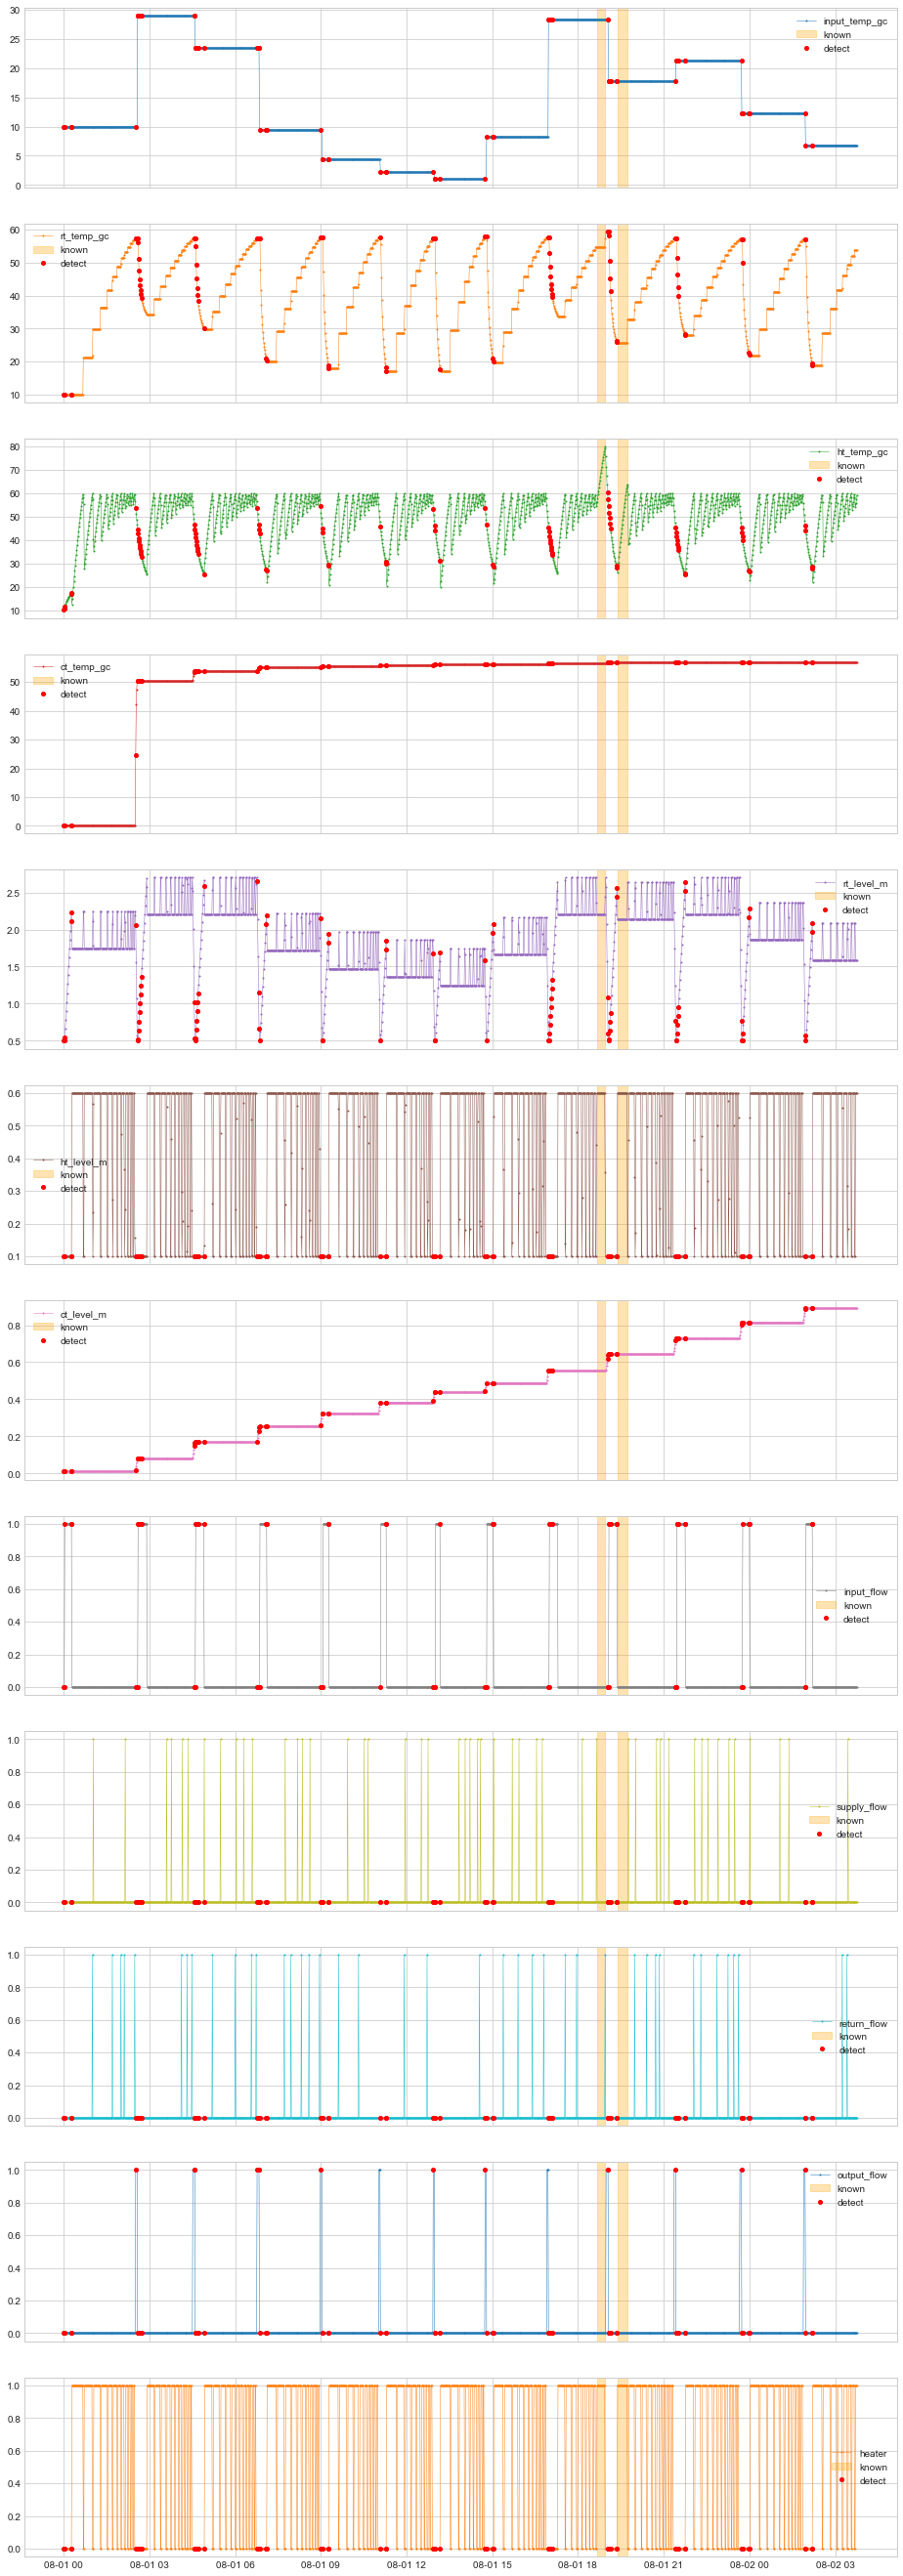

In [33]:
regression_ad = RegressionAD(regressor=LinearRegression(), target="rt_level_m", c=3.0)

train = ds.train_generator()
data, anomalies, info = next(train)
regression_ad.fit(data)

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
detect = regression_ad.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

### PcaAD

In [35]:
from adtk.detector import PcaAD

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

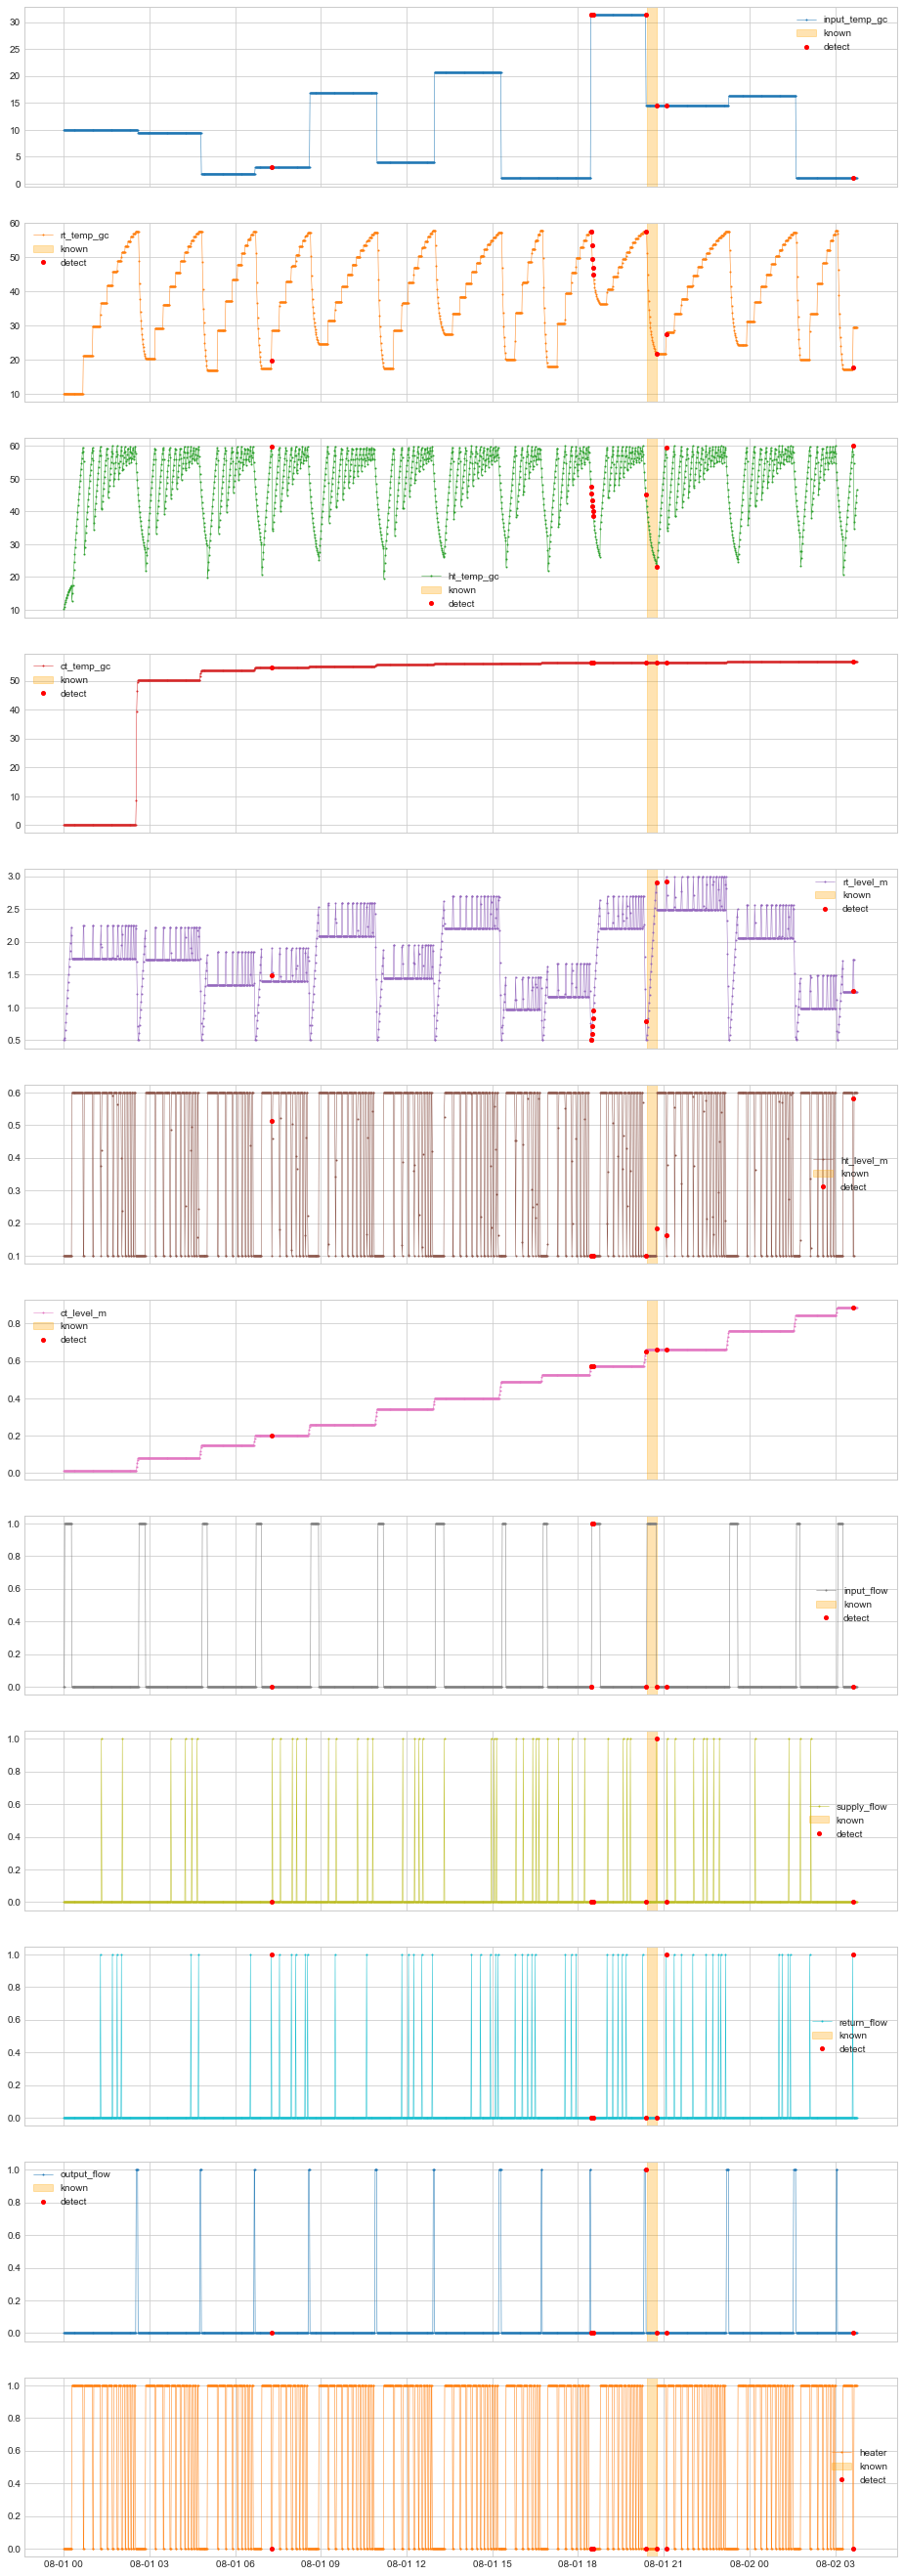

In [48]:
pca_ad = PcaAD(k=5, c=3.0)

train = ds.train_generator()
data, anomalies, info = next(train)
pca_ad.fit(data)

test = ds.test_generator()
for data, anomalies, info in test:
    if max(anomalies):
        break
detect = pca_ad.detect(data)

plot(data,
     anomaly={"known": anomalies, "detect": detect},
     anomaly_tag={"known": "span", "detect": "marker"},
     anomaly_color={"known": "orange", "detect": "red"})

I expected more